In [19]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### DATA

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


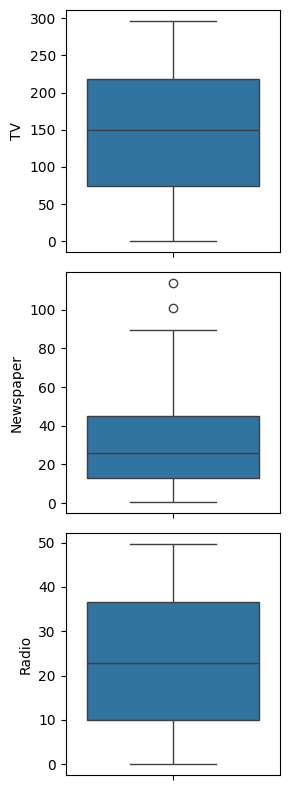

In [11]:
fig, axs = plt.subplots(3, figsize = (3,8))
plt1 = sns.boxplot(df['TV'], ax= axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers in the data

### EDA

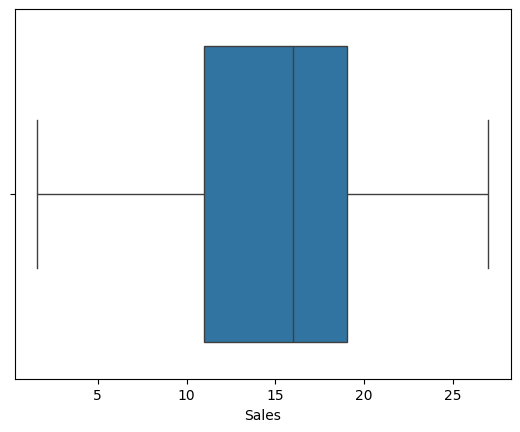

In [13]:
sns.boxplot(df['Sales'], orient='h')
plt.show()

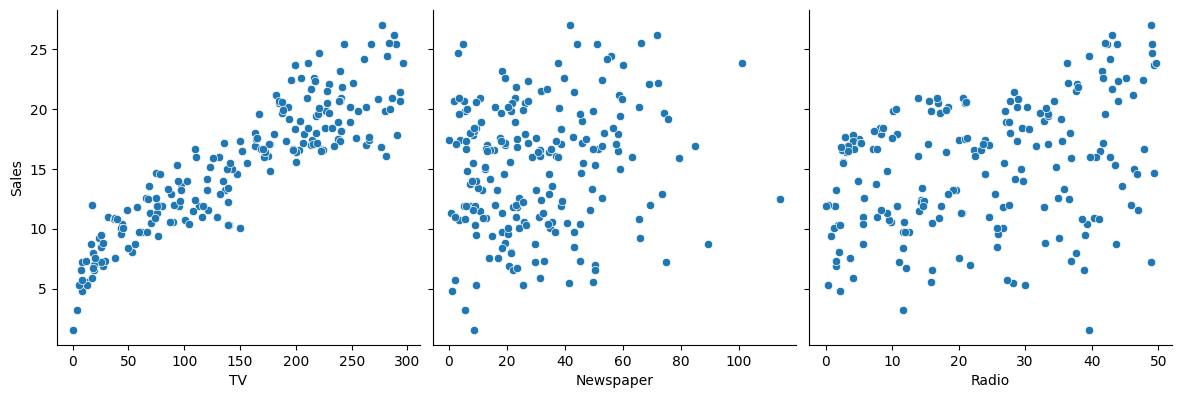

In [14]:
# Relation between sales and other variables
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

We can see a clear positive correlation between TV advertising and sales, and a weak correlation between Radio and Sales.

Let's confirm our observations by seeing correlation between the variables

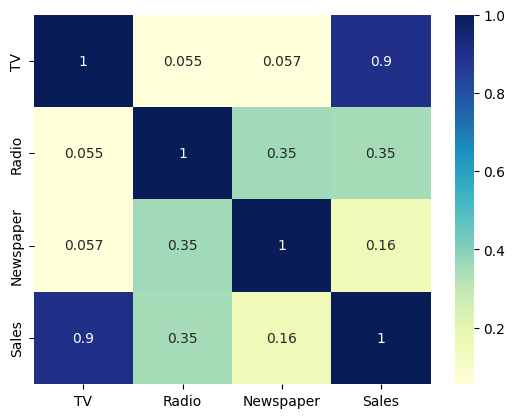

In [15]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

Indeed there is a high correlation between TV & Sales. We will build a simple linear regression model using TV as feature variable

### Model

In [24]:
X = df[['TV']]
y = df['Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test) 

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.101072906773963


In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.9502948931650088


In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R² Score:", r2)  # Measures how well predictions fit the actual values (1 is perfect, 0 is no fit)

R² Score: 0.802561303423698


In [34]:
print(f"Intercept : {model.intercept_}")
print(f"Coefficient {model.coef_}")

Intercept : 7.007108428241848
Coefficient [0.05548294]


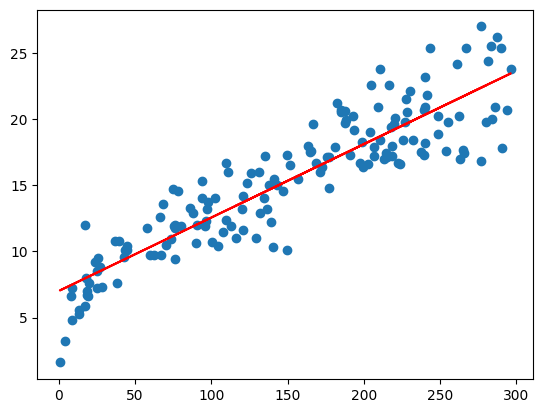

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.007108428241848 + 0.05548294*X_train, 'r')
plt.show()